In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/lung_cancer.csv")
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


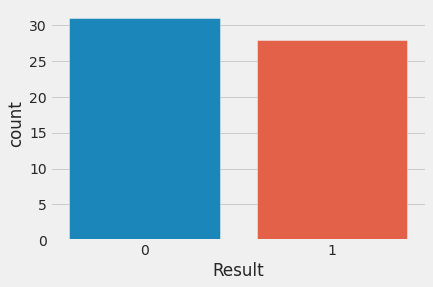

In [5]:
sns.countplot(x='Result', data=df)

In [8]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        
df['Result'] = df.Result.astype("category").cat.codes

In [9]:
categorical_col.remove('Result')

ValueError: ignored

In [10]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('Result', axis=1)
y = df.Result

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [13]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    20.0  21.0       1.0       41.0          41.0
_______________________________________________
Confusion Matrix: 
 [[20  0]
 [ 0 21]]

Test Result:
Accuracy Score: 88.89%
_______________________________________________
CLASSIFICATION REPORT:
                   0         1  accuracy  macro avg  weighted avg
precision   1.000000  0.777778  0.888889   0.888889      0.913580
recall      0.818182  1.000000  0.888889   0.909091      0.888889
f1-score    0.900000  0.875000  0.888889   0.887500      0.890278
support    11.000000  7.000000  0.888889  18.000000     18.000000
_______________________________________________
Confusion Matrix: 
 [[9 2]
 [0 7]

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    20.0  21.0       1.0       41.0          41.0
_______________________________________________
Confusion Matrix: 
 [[20  0]
 [ 0 21]]

Test Result:
Accuracy Score: 83.33%
_______________________________________________
CLASSIFICATION REPORT:
                   0         1  accuracy  macro avg  weighted avg
precision   0.900000  0.750000  0.833333   0.825000      0.841667
recall      0.818182  0.857143  0.833333   0.837662      0.833333
f1-score    0.857143  0

In [16]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns)
features.remove("Result")

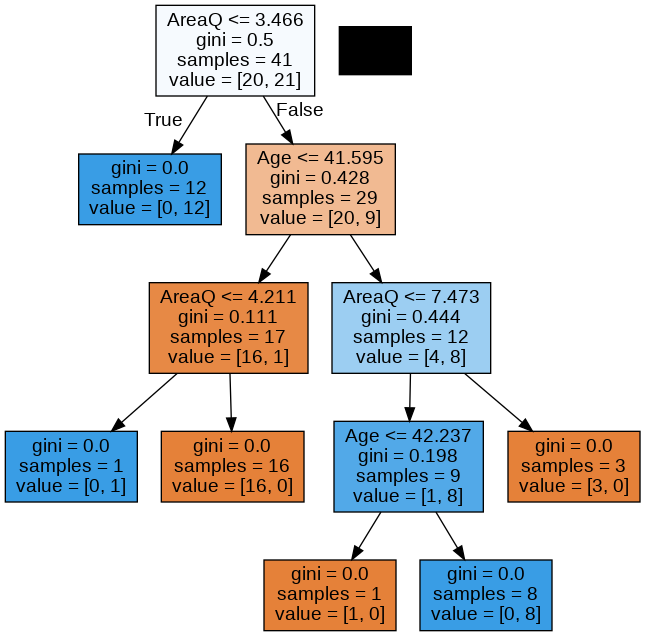

In [17]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# **Linear Regression**

In [18]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/reg.csv', encoding="utf-8")

In [19]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [25]:
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def lin(ds, y_val):
  y = ds[y_val].values
  ds.drop(y_val, axis=1, inplace=True)
  #print(ds.head())
  x = ds.iloc[:].values


  # Splitting the dataset into training and test set.  
 
  x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 
  classifier = LinearRegression()
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  print(y_pred)
  score = mean_squared_error(y_test, y_pred)
  print("\n Mean Squared error:\t"+str(score))
  sns.lmplot(x='RH',y='PE',data=df,aspect=2,height=6)
  print("\n\n")
  ds.plot.scatter(x = 'AT', y = 'PE', s = 1, c='green');
  print("\n\n")
  corr = ds.corr()
  sns.heatmap(corr, cmap = 'Wistia', annot= True);
  lm=linear_model.LinearRegression()
  model=lm.fit(x_train,y_train)
  pred=lm.predict(x_train)
  print(pred)
  print(model.coef_)
  print(model.intercept_)
  y_pred = lm.predict(x_test)
  score = mean_squared_error(y_test,y_pred)
  print(score)
  print(r2_score(pred,y_train))
  predd = lm.predict(x_test)
  print(r2_score(predd,y_test))
  #print("\nAccuracy score:\t"+str(accuracy_score(x_test,y_test)*100))

[69.42840455 53.12830849 51.96908514 ... 42.06936609 41.33498564
 63.49589119]

 Mean Squared error:	37.33487054761878






[47.32344468 68.90498626 52.49994471 ... 51.44804726 48.93305719
 69.3166825 ]
[ 0.729788    0.17532246  0.11125979 -0.41543592]
42.97785919016527
37.33487054761878
0.704092463762724
0.7051895503285368


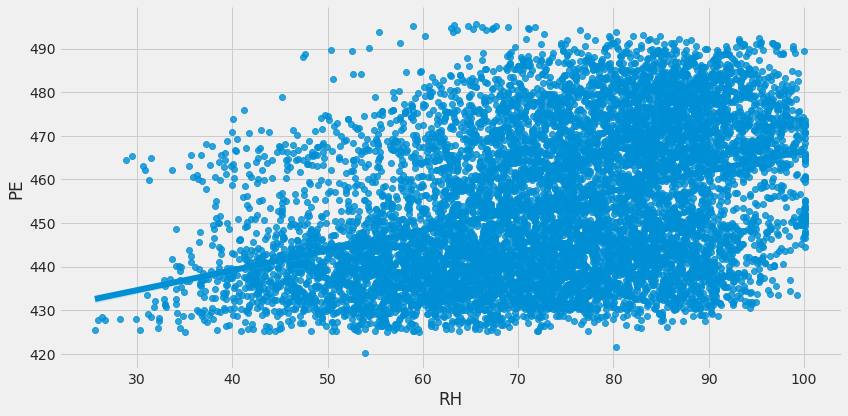

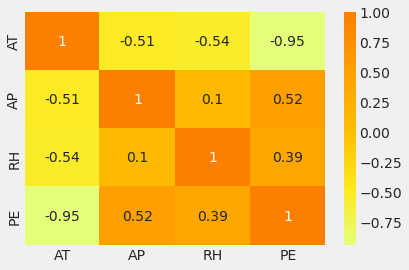

In [26]:
#model.fit(x, y)
lin(df.copy(), 'V')

In [27]:

df_encode = df
# X = df_encode.drop('PE',axis=1) # Independet variable
X = df_encode['AT'].values # Independet variable
y = df_encode['PE'].values # dependent variable

X = X.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [28]:
lm=linear_model.LinearRegression()
model=lm.fit(X_train,y_train)
pred=lm.predict(X_train)
print(pred)
print(model.coef_)
print(model.intercept_)
#checking accuracy:
from sklearn.metrics import r2_score
print(r2_score(pred,y_train))
predd = lm.predict(X_test)
print(r2_score(predd,y_test))

[452.32804974 468.44412264 429.63974253 ... 444.43269235 441.46108806
 452.4148119 ]
[-2.16905423]
496.96718571318087
0.8854247982024653
0.891751499486316


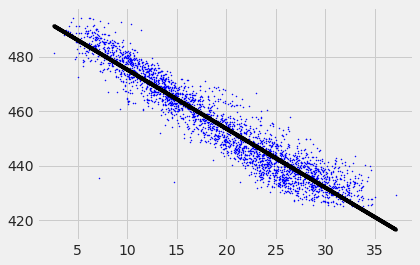

In [29]:
y_pred = lm.predict(X_test)
plt.scatter(X_test, y_test, color ='b',s=1)
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning/lung_cancer.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [ ]:
dataset.drop("Name", axis=1, inplace=True)
dataset.drop("Surname", axis=1, inplace=True)
dataset.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


In [ ]:
Y = dataset[dataset.Result == 1]
Y.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
4,68,4,5,6,1
9,52,18,4,5,1
13,28,20,2,8,1


In [ ]:
N = dataset[dataset.Result == 0]
N.head()

,Age,Smokes,AreaQ,Alkhol,Result
2,30,0,5,2,0
3,28,0,8,1,0
5,34,0,10,0,0
6,58,15,10,0,0
7,22,12,5,2,0


# **Data Visualization**

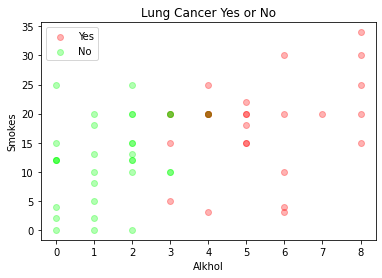

In [ ]:
plt.title("Lung Cancer Yes or No")
plt.xlabel("Alkhol")
plt.ylabel("Smokes")
plt.scatter(Y.Alkhol, Y.Smokes, color = "red", label = "Yes", alpha = 0.3)
plt.scatter(N.Alkhol, N.Smokes, color = "lime", label = "No", alpha = 0.3)
plt.legend()
plt.show()

**Decision Tree with Sklearn**

In [ ]:
# dataset.Result = [1 if i == "Y" else 0 for i in dataset.Result]

In [ ]:
x = dataset.drop(["Result"], axis = 1)
y = dataset.Result.values

In [ ]:
# Normalization:
x = (x - np.min(x)) / (np.max(x) - np.min(x))

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
# prediction
dt.score(x_test, y_test)

1.0

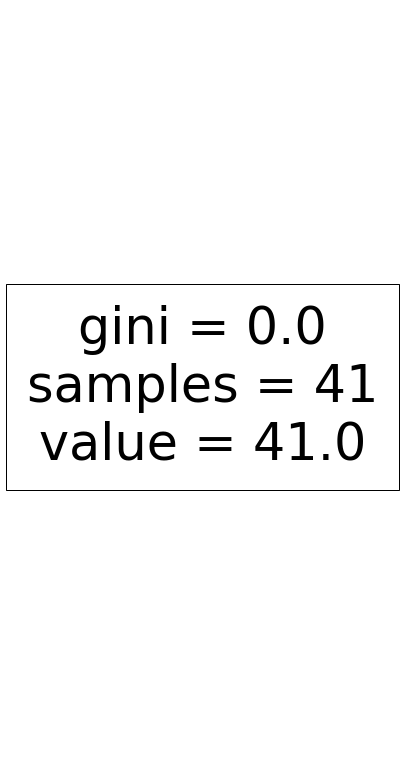

In [ ]:
plt.figure(figsize=(7,14))
plot_tree(dt, feature_names = x.columns, class_names=['Result', "Alkhol"], filled=True);

# **Linear Regression**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
pip install odfpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 717 kB 5.0 MB/s 
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160692 sha256=a370d45437b1a287fac994769fe7beb4d5c0d3199f0fdfd98ee1b2c79c795107
  Stored in directory: /root/.cache/pip/wheels/e2/f4/5d/a68c656235d33455a1d0f78e877acddfa006907a6d52d7e6ee
Successfully built odfpy


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/lung_cancer.csv')

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/Machine Learning/lung_cancer.csv')

ValueError: ignored

In [ ]:
from sklearn.preprocessing import RobustScaler,StandardScaler

SourceData_train_independent= df.drop(["PE"], axis=1) # Drop depedent variable from training dataset
SourceData_train_dependent=df["PE"].copy() #  New dataframe with only independent variable value for training dataset
SourceData_test_independent=df1.drop(["PE"], axis=1)
SourceData_test_dependent=df1["PE"].copy()
sc_X = StandardScaler()
X_train=sc_X.fit_transform(SourceData_train_independent.values) #scale the independent variables
y_train=SourceData_train_dependent # scaling is not required for dependent variable
X_test=sc_X.transform(SourceData_test_independent)
y_test=SourceData_test_dependent
reg = LinearRegression().fit(X_train, y_train)
print("The Linear regression score on training data is ", round(reg.score(X_train, y_train),2))
predict=reg.predict(X_test)